In [69]:
N = 10000
totient = [0] * (N+1)
sigma = [0] * (N+1)

with open("data.csv") as h:
    for line in h.read().split("\n"):
        a, b, c = map(int, line.split(" "))
        totient[a] = b
        sigma[a] = c
        if a == N: break



In [70]:
import math
c = 6**0.5 / math.pi

import numpy as np
import matplotlib.pyplot as plt

In [71]:
from collections import Counter

pfactorize = [Counter() for _ in range(N + 1)]

def init_pfactorize():
    for i in range(2, N + 1):
        if pfactorize[i]:
            continue
        
        pow_i = i
        while pow_i <= N:
            for j in range(pow_i, N + 1, pow_i):
                pfactorize[j][i] += 1
            if pow_i > N // i:
                break
            pow_i *= i

init_pfactorize()

In [72]:
AM = [(totient[i] + sigma[i])/2 for i in range(N+1)]
GM = [(totient[i]*sigma[i])**0.5 for i in range(N+1)]
HM = [0] + [2/(1/totient[i]+1/sigma[i]) for i in range(1, N+1)]


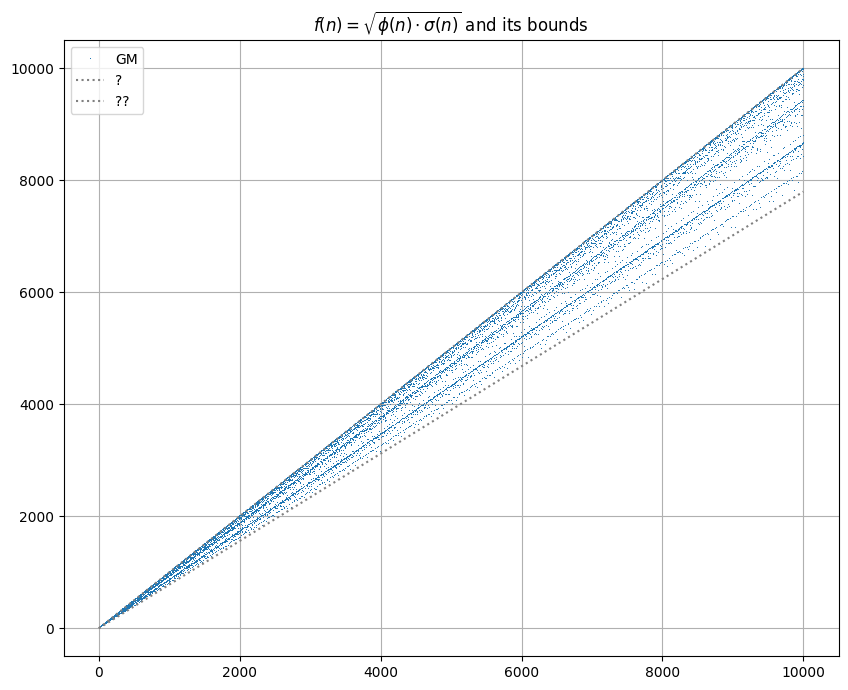

In [75]:

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=100)
x = np.arange(1, N+1)  # Correct range: 1 to 100 inclusive

# Customize ticks (only every 25 on x, every 50 on y)
#plt.xticks(np.arange(0, N+1, 25))  # x-ticks every 25
#plt.yticks(np.arange(0, max(sigma[1:N+1]) + 50, 50))  # y-ticks every 50

# Major gridlines (every 25 in x, every 50 in y) - DEFAULT
#plt.grid(True, which='major', color='gray', linestyle='-', linewidth=0.7)

# Minor gridlines (every 5 in x, every 10 in y) - LIGHTER
#plt.grid(True, which='minor', color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
#plt.minorticks_on()  # Enable minor ticks

plt.plot(x, GM[1:N+1], ',', label='GM')

plt.plot(x, x, ':', label='?', color='gray')

plt.plot(x, x*c, ':', label='??', color='gray')

# Customize the plot
plt.title('$f(n) = \sqrt{\phi(n)\cdot\sigma(n)}$ and its bounds')
plt.legend()
plt.grid(True)
plt.show()

